In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = '5_yrs_grid_data2.csv'
data=pd.read_csv(file_path)
df['DateTime'] = pd.to_datetime(df['DateTime'])

date = data['DateTime'].dt.date
energy = data['Power generated by system | (MW)']

# Convert the date column to a numerical column
date_num = pd.Categorical(date).codes

# Combine the date and energy columns
X = pd.concat([pd.Series(date_num), energy], axis=1)

# Define the target column as stability

X = data[['date_num','c1','c2','c3','p1','p2','p3','n1c','n2c','n3c']]
y = data[['stability']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
#model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X)


accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


AttributeError: Can only use .dt accessor with datetimelike values

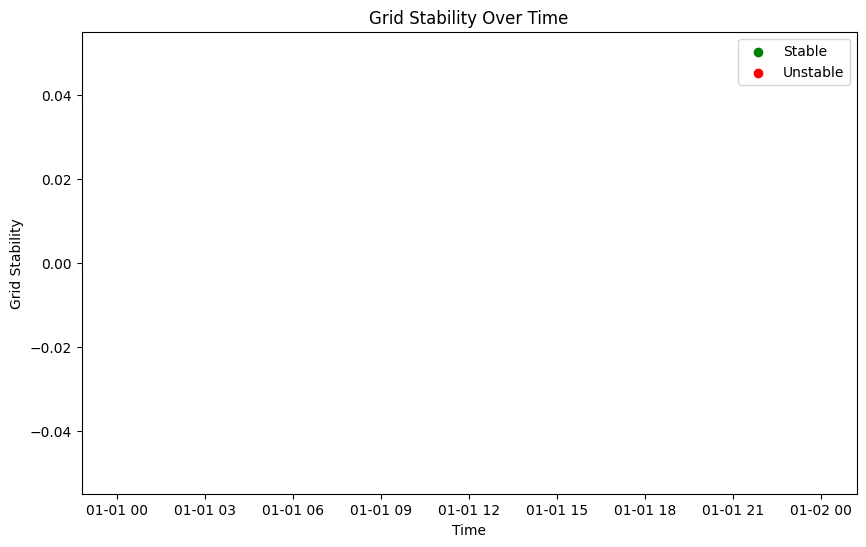

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('5_yrs_grid_data2.csv')

# Assuming 'time' is the column representing time and 'stability' is the column representing grid stability ('stable' or 'unstable')

# Convert 'time' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Plot times when the grid is stable and unstable
plt.figure(figsize=(10, 6))
plt.scatter(df[df['stability'] == '1']['DateTime'], df[df['stability'] == '1']['stability'],[1] * len(df[df['stability'] == '1']), color='green', label='Stable')
plt.scatter(df[df['stability'] == '0']['DateTime'], df[df['stability'] == '0']['stability'], color='red', label='Unstable')
plt.xlabel('Time')
plt.ylabel('Grid Stability')
plt.title('Grid Stability Over Time')
plt.legend()
plt.show()
